Data is consists of 7 variables, and 12 Likert scale based questions giving us points that measure either frequency or intensity of various aspects of Mental Health. A low score of 0 generally indicates low frequency or intensity, and a high score of 5 typically indicates high frequency or intensity. The main objective of this study is to investigate whether there is a correlation between Social Media usage and Mental health, and to explore and try to predict whether the individual is suffering from mental health symptoms and should be recommended a mental health checkup

## Data Description
Variables 

1. Age
2. Gender
3. Relationship Status
4. Occupation Status
5. Affiliated Organizations
6. Social Medias Used
7. Time spent - social media use, in hours

### Measurements of Frequency or Intensity of mental health symptoms is take through Likert Scale questions - 

1.   Purposeless use of Social Media [ADHD] - Question 9
2.   Distracted by Social Media [ADHD] - Question 10
3. Restlessness if Social Media not used [Anxiety] - Question 11
4. Ease of Distraction by Social Media [ADHD] - Question 12
5. Bothered by worries [Anxiety] - Question 13
6. Difficulty in concentrating [ADHD] - Question 14
7. Comparison of self to peers [Self Esteem] - Question 15
8. Feelings about above comparison [Self Esteem] - Question 16
9. Validation sought from Social Media [Self Esteem] - Question 17
10. Feelings of Depression [Depression] - Question 18
11. Fluctuation of interest [Depression] - Question 19
12. Sleep Issues [Depression] - Question 20

## Import Lib

In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Load Data

In [12]:
df = pd.read_csv('smmh.csv')

In [14]:
df.sample(3).T

,286,250,457
Timestamp,5/11/2022 21:22:00,5/11/2022 19:31:52,5/13/2022 23:36:54
1. What is your age?,24.0,34.0,51.0
2. Gender,Male,Female,Male
3. Relationship Status,Single,Married,Married
4. Occupation Status,University Student,Salaried Worker,Salaried Worker
5. What type of organizations are you affiliated with?,University,School,Private
6. Do you use social media?,Yes,Yes,Yes
7. What social media platforms do you commonly use?,"Facebook, Twitter, Instagram, YouTube, Discord",Facebook,"Facebook, Twitter, Instagram, YouTube"
8. What is the average time you spend on social media every day?,Between 3 and 4 hours,Between 1 and 2 hours,Between 1 and 2 hours
9. How often do you find yourself using Social media without a specific purpose?,4,2,3


In [16]:
df.shape

(481, 21)

## Data Pre-processing and Cleaning

### Renaming the Columns

In [21]:
df.columns

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

In [22]:
df.rename(columns = {'1. What is your age?':'Age','2. Gender':'Sex','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

### Re-arranging the Columns

In [24]:
titles = list(df.columns)
titles

['Timestamp',
 'Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'Anxiety Q1',
 'ADHD Q3',
 'Anxiety Q2',
 'ADHD Q4',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [26]:
titles[11], titles[12] = titles[12], titles[11]
titles[12], titles[14] = titles[14], titles[12]
titles[13], titles[14] = titles[14], titles[13]
df = df[titles]
titles

['Timestamp',
 'Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q4',
 'Anxiety Q2',
 'ADHD Q3',
 'Anxiety Q1',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

### Missing Value

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            481 non-null    object 
 1   Age                  481 non-null    float64
 2   Sex                  481 non-null    object 
 3   Relationship Status  481 non-null    object 
 4   Occupation           481 non-null    object 
 5   Affiliations         451 non-null    object 
 6   Social Media User?   481 non-null    object 
 7   Platforms Used       481 non-null    object 
 8   Time Spent           481 non-null    object 
 9   ADHD Q1              481 non-null    int64  
 10  ADHD Q2              481 non-null    int64  
 11  ADHD Q4              481 non-null    int64  
 12  Anxiety Q2           481 non-null    int64  
 13  ADHD Q3              481 non-null    int64  
 14  Anxiety Q1           481 non-null    int64  
 15  Self Esteem Q1       481 non-null    int

## Data Transformation

In [31]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,481,480,5/11/2022 22:54:32,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,481.0,NaN,NaN,NaN,26.13659,9.91511,13.0,21.0,22.0,26.0,91.0
Sex,481,9,Female,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship Status,481,4,Single,285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,481,4,University Student,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Affiliations,451,18,University,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Social Media User?,481,2,Yes,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platforms Used,481,125,"Facebook, Instagram, YouTube",35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time Spent,481,6,More than 5 hours,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADHD Q1,481.0,NaN,NaN,NaN,3.553015,1.096299,1.0,3.0,4.0,4.0,5.0


In [33]:
Genders = set(df['Sex'])
print(Genders)

{'Male', 'Non-binary', 'Non binary ', 'Nonbinary ', 'Female', 'unsure ', 'There are others???', 'Trans', 'NB'}


In [34]:
df.Sex.value_counts()

Sex
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64

In [36]:
df.drop(df.loc[df['Sex'] =='There are others???'].index, inplace=True)

In [38]:
Genders = set(df['Sex'])
print(Genders)

{'Male', 'Non-binary', 'Non binary ', 'Nonbinary ', 'Female', 'unsure ', 'Trans', 'NB'}


In [39]:
gender_mapping = {
    'Male': 'Male',
    'Female': 'Female',
    'Non-binary': 'Other',
    'Non binary ': 'Other',
    'Nonbinary ': 'Other',
    'unsure ': 'Other',
    'Trans': 'Other',
    'NB': 'Other'
}

In [40]:
df['Sex'] = df['Sex'].map(gender_mapping).fillna('Other')

In [41]:
df.Sex.value_counts()

Sex
Female    263
Male      211
Other       6
Name: count, dtype: int64

In [43]:
df['Age'] = df['Age'].astype(int)

In [48]:
#setting scores of 3,4 and 5 to 0.
df.loc[df['Self Esteem Q2'] == 3, 'Self Esteem Q2'] = 0
df.loc[df['Self Esteem Q2'] == 4, 'Self Esteem Q2'] = 0
df.loc[df['Self Esteem Q2'] == 5, 'Self Esteem Q2'] = 0
#Setting scores of '1' to '4' and '2' to '2'.
df.loc[df['Self Esteem Q2'] == 1, 'Self Esteem Q2'] = 4
df.loc[df['Self Esteem Q2'] == 2, 'Self Esteem Q2'] = 2

### Summation of Scores of different aspects of mental well being

One of the requirements for this research to be valid is to calculate the total number of points accrued by the different questions on various aspects of mental health and wellbeing.

Questions measure 4 aspects of mental wellbeing -

Attention Deficit Hyperactivity Disorder (ADHD)
Anxiety
Self Esteem
Depression
Therefore, new columns are created for each of the 4 aspects, and another column named "Total Score" is to be created. Since it is assigned the sum total of all the questions as a numerical value, it can have a maximum value of 59.

In [50]:
#Summing scores from ADHD, Anxiety, Self Esteem and Depression individually and creating a new column

ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
df['ADHD Score'] = df[ADHD].sum(axis=1)

Anxiety = ['Anxiety Q1', 'Anxiety Q2']
df['Anxiety Score'] = df[Anxiety].sum(axis=1)

SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2','Self Esteem Q3']
df['Self Esteem Score'] = df[SelfEsteem].sum(axis=1)

Depression = ['Depression Q1', 'Depression Q2','Depression Q3']
df['Depression Score'] = df[Depression].sum(axis=1)

Total = ['ADHD Score', 'Anxiety Score','Self Esteem Score','Depression Score']
df['Total Score'] = df[Total].sum(axis=1)

#Deleting question columns and timestamp columns as they are no longer used
df.drop(df.iloc[:, 9:21], inplace = True, axis = 1)
df.drop(['Timestamp'], inplace = True, axis = 1)

In [51]:
df.head()

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,18,4,4,14,40
1,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,15,7,10,14,46
2,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,11,6,4,11,32
3,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,12,6,11,9,38
4,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,17,9,6,9,41


In this section, we consider adding an "Outcome" variable based on the "Total Score" of the participant.

Previously, it was established that the "Total score" indicates magnitude of individual experiencing negative symptoms of mental health. An accumulated total score of 59 is the highest an individual can obtain from the questionnaire, which would indicate that the individual is definitely experiencing negative symptoms in some aspect of mental health, based on binary classification.

The Outcome variable is defined as whether we think that the individual is experiencing mental health disease symptoms in some aspect, and whether we are recommending the participant to get a mental health checkup or not.

A participant with a score of 3 out of 5 on every question on the questionnaire suggests that they are are experiencing slight to moderate symptoms in every aspect of mental health, but they may not be severe or frequent enough, giving a score of 35 (12 questions, scores of 3 on each question except for self esteem question #2 with score of 2 = 35 score total score).

Therefore, we assign a rational value of 40 to be the point where we can reliably say that the individual is very likely to be suffering severely and extremely frequently from some symptoms, and thus we highly recommend a mental health checkup.

An Outcome of 0 means that individual is not confirmed to be experiencing severe mental health symptoms. Therefore we do not think the individual needs to go to get a mental health check up.

An Outcome of 1 means that the individual definitely experiencing some severe negative symptoms of mental health. They are recommended to go to get a mental health check up.

In [53]:
def map_score(score):
  if score < 40:
    return "0"
  elif score >= 40:
    return "1"

df['Outcome']= df['Total Score'].apply(lambda score: map_score(score))
df['Outcome'] = df['Outcome'].astype('int64')

In [55]:
df.describe()

,Age,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,26.143750,13.460417,6.147917,6.266667,9.639583,35.514583,0.370833
std,9.923621,3.898302,2.087090,2.759635,3.104528,9.274507,0.483532
min,13.000000,4.000000,2.000000,2.000000,3.000000,14.000000,0.000000
25%,21.000000,11.000000,5.000000,4.000000,7.750000,29.000000,0.000000
50%,22.000000,14.000000,6.000000,6.000000,10.000000,36.000000,0.000000
75%,26.000000,16.000000,8.000000,8.000000,12.000000,42.000000,1.000000
max,91.000000,20.000000,10.000000,14.000000,15.000000,58.000000,1.000000


## Converting category to Numerical Values

In [58]:
df.loc[df['Time Spent'] == 'Less than an Hour', 'Time Spent'] = 0
df.loc[df['Time Spent'] == 'Between 1 and 2 hours', 'Time Spent'] = 1
df.loc[df['Time Spent'] == 'Between 2 and 3 hours', 'Time Spent'] = 2
df.loc[df['Time Spent'] == 'Between 3 and 4 hours', 'Time Spent'] = 3
df.loc[df['Time Spent'] == 'Between 4 and 5 hours', 'Time Spent'] = 4
df.loc[df['Time Spent'] == 'More than 5 hours', 'Time Spent'] = 5

In [60]:
df['Time Spent'] = df['Time Spent'].astype('int64')

In [67]:
df.loc[df['Sex'] == 'Male', 'Sex'] = 0
df.loc[df['Sex'] == 'Female', 'Sex'] = 1
df.loc[df['Sex'] == 'Other', 'Sex'] = 2
df['Sex'] = df['Sex'].astype('int64')

## Correlation Plot and Heatmap

In [71]:
df.drop(['Total Score'], inplace = True, axis = 1)

KeyError: "['Total Score'] not found in axis"

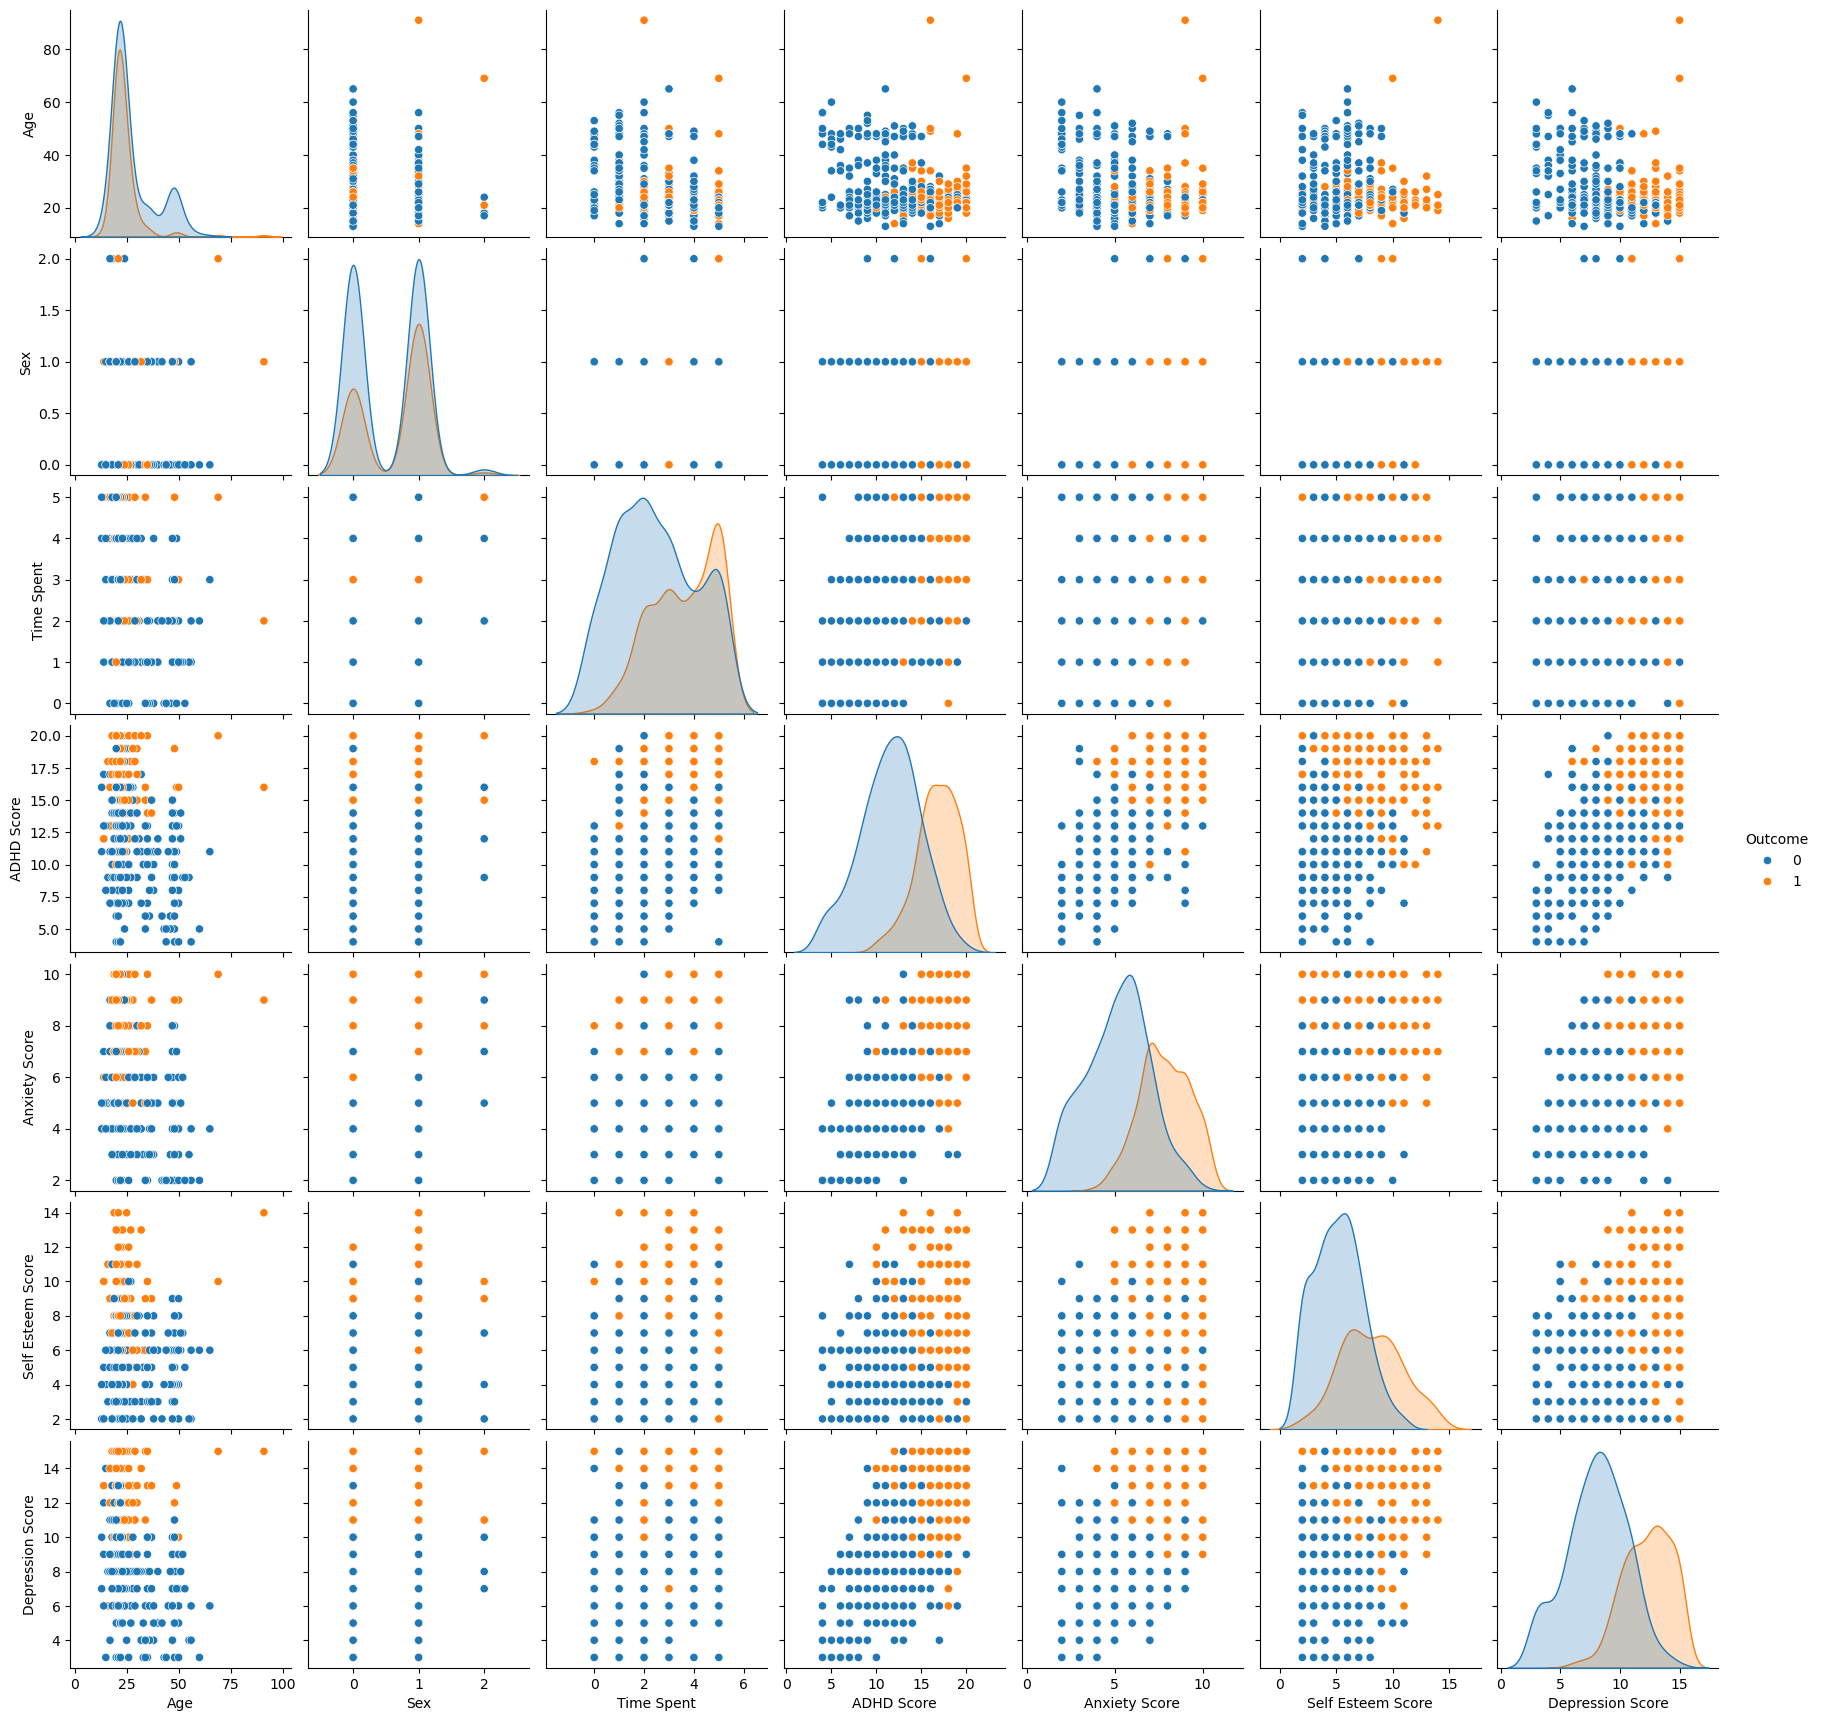

In [70]:
sns.pairplot(df,hue='Outcome',diag_kind='kde')

The scatterplots suggest low to moderately corelated data. There is a chance that machine learning algorithms may pick out hidden patterns during the training phase of predictive model. Hence models built on this data be able to achieve high levels of accuracy.

## Model

In [75]:
#Deleting columns and updating dataset for training and predicting.
df.drop(df.iloc[:, 2:7], inplace = True, axis = 1)

In [77]:
df.head()

,Age,Sex,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Outcome
0,21,0,2,18,4,4,14,1
1,21,1,5,15,7,10,14,1
2,21,1,3,11,6,4,11,0
3,21,1,5,12,6,11,9,0
4,21,1,2,17,9,6,9,1


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
standardizer = StandardScaler()

In [80]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30,random_state=6)

In [82]:
model = LogisticRegression()
modelNB = GaussianNB()

### Logistic

In [96]:
model.fit(X_train, y_train)

LogisticRegression()

In [97]:
predicted= model.predict(X_test)
accuracy= model.score(X_test,y_test)

In [98]:
metrics.confusion_matrix(y_test, predicted)

array([[82,  1],
       [ 0, 61]], dtype=int64)

In [99]:
accuracy

0.9930555555555556

In [100]:
metrics.accuracy_score(y_test, predicted)

0.9930555555555556

In [101]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

print("Accuracy:", accuracy_score(y_test, predicted))
print("\nClassification Report:\n", classification_report(y_test, predicted))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix:\n", conf_matrix)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.9930555555555556

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        83
           1       0.98      1.00      0.99        61

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144

Confusion Matrix:
 [[82  1]
 [ 0 61]]
ROC-AUC Score: 1.0


### Gaussian Naive Bayes

In [89]:
modelNB.fit(X_train, y_train)

GaussianNB()

In [90]:
predicted= modelNB.predict(X_test)
accuracy= modelNB.score(X_test,y_test)

In [91]:
metrics.confusion_matrix(y_test, predicted)

array([[76,  7],
       [ 1, 60]], dtype=int64)

In [92]:
metrics.accuracy_score(y_test, predicted)

0.9444444444444444

In [93]:
import joblib

# Save the model
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']